## CSI 5137[C] Application of NLP and ML in Software Engineering 
## For 'KC1' Dataset
```
#Project : Predicting Software Bugs using Machine Learning algorithms 
Honey Patel - 300253332
Jay Patel - 300288159
```


### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Traning algorithms without resampling and feature selection 

###Importing the final dataset 

In [ ]:
dataset = pd.read_csv("kc1.csv")
dataset

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,83.0,11.0,1.0,11.0,171.0,927.89,0.04,23.04,40.27,21378.61,...,65,10,6,0,18.0,25.0,107.0,64.0,21.0,True
3,46.0,8.0,6.0,8.0,141.0,769.78,0.07,14.86,51.81,11436.73,...,37,2,5,0,16.0,28.0,89.0,52.0,15.0,True
4,25.0,3.0,1.0,3.0,58.0,254.75,0.11,9.35,27.25,2381.95,...,21,0,2,0,11.0,10.0,41.0,17.0,5.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2104,19.0,2.0,1.0,2.0,40.0,175.69,0.15,6.82,25.77,1197.90,...,12,1,2,0,10.0,11.0,25.0,15.0,3.0,False
2105,23.0,3.0,3.0,3.0,60.0,278.63,0.10,9.69,28.75,2700.58,...,18,1,2,0,12.0,13.0,39.0,21.0,5.0,False
2106,2.0,1.0,1.0,1.0,4.0,8.00,0.67,1.50,5.33,12.00,...,0,0,0,0,3.0,1.0,3.0,1.0,1.0,False
2107,13.0,1.0,1.0,1.0,17.0,60.94,0.25,4.00,15.24,243.78,...,6,0,5,0,6.0,6.0,9.0,8.0,1.0,False


## Data Preprocessing

### Checking for missing values

In [ ]:
#checking for missing values
print('Number of Missing values in each column')
dataset.isnull().sum()

Number of Missing values in each column


loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

### Checking for null values

In [ ]:
#checking for null values
dataset.isna().any()

loc                  False
v(g)                 False
ev(g)                False
iv(g)                False
n                    False
v                    False
l                    False
d                    False
i                    False
e                    False
b                    False
t                    False
lOCode               False
lOComment            False
lOBlank              False
locCodeAndComment    False
uniq_Op              False
uniq_Opnd            False
total_Op             False
total_Opnd           False
branchCount          False
defects              False
dtype: bool

### Categorizing the Dataset into different dataframes

In [ ]:
#taking only numeric data
dataset_numeric = dataset[["v(g)", "ev(g)", "iv(g)", "n", "v", "l",	"d", "i", "e", "b", "t", "lOCode", "lOComment", "lOBlank", "locCodeAndComment", "uniq_Op",	"uniq_Opnd",	"total_Op",	"total_Opnd", "branchCount"]].copy()
dataset_numeric.head()

,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,1.30,1.30,2,2,2,2,1.2,1.2,1.2,1.2,1.4
1,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1.0,1.0,1.0,1.0,1.0
2,11.0,1.0,11.0,171.0,927.89,0.04,23.04,40.27,21378.61,0.31,1187.70,65,10,6,0,18.0,25.0,107.0,64.0,21.0
3,8.0,6.0,8.0,141.0,769.78,0.07,14.86,51.81,11436.73,0.26,635.37,37,2,5,0,16.0,28.0,89.0,52.0,15.0
4,3.0,1.0,3.0,58.0,254.75,0.11,9.35,27.25,2381.95,0.08,132.33,21,0,2,0,11.0,10.0,41.0,17.0,5.0


In [ ]:
#taking only the target label
dataset_target = dataset[["defects"]].copy()
dataset_target.head()

,defects
0,False
1,True
2,True
3,True
4,True


### Combining the dataframes

In [ ]:
frames = [dataset_numeric, dataset_target]
dataset = pd.concat(frames, axis=1)
dataset

,v(g),ev(g),iv(g),n,v,l,d,i,e,b,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,11.0,1.0,11.0,171.0,927.89,0.04,23.04,40.27,21378.61,0.31,...,65,10,6,0,18.0,25.0,107.0,64.0,21.0,True
3,8.0,6.0,8.0,141.0,769.78,0.07,14.86,51.81,11436.73,0.26,...,37,2,5,0,16.0,28.0,89.0,52.0,15.0,True
4,3.0,1.0,3.0,58.0,254.75,0.11,9.35,27.25,2381.95,0.08,...,21,0,2,0,11.0,10.0,41.0,17.0,5.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2104,2.0,1.0,2.0,40.0,175.69,0.15,6.82,25.77,1197.90,0.06,...,12,1,2,0,10.0,11.0,25.0,15.0,3.0,False
2105,3.0,3.0,3.0,60.0,278.63,0.10,9.69,28.75,2700.58,0.09,...,18,1,2,0,12.0,13.0,39.0,21.0,5.0,False
2106,1.0,1.0,1.0,4.0,8.00,0.67,1.50,5.33,12.00,0.00,...,0,0,0,0,3.0,1.0,3.0,1.0,1.0,False
2107,1.0,1.0,1.0,17.0,60.94,0.25,4.00,15.24,243.78,0.02,...,6,0,5,0,6.0,6.0,9.0,8.0,1.0,False


### Spliting the dataset

In [ ]:
X = dataset.drop("defects", axis=1)
y = dataset.defects

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)

### Feature Scaling on numeric data

In [ ]:
numerical_features = ["v(g)", "ev(g)", "iv(g)", "n", "v", "l",	"d", "i", "e", "b", "t", "lOCode", "lOComment", "lOBlank", "locCodeAndComment", "uniq_Op",	"uniq_Opnd",	"total_Op",	"total_Opnd", "branchCount"]
scaler = StandardScaler()

transformer = ColumnTransformer([("scaler", scaler, numerical_features)], remainder = "passthrough")
transformed_X_train = transformer.fit_transform(X_train)
transformed_X_test = transformer.transform(X_test)
X_train = transformed_X_train
X_test = transformed_X_test

## Applying algorithms and Training models using 10 fold cross validation

### Defining the models : Decision tree, Random forest, Logistic Regression, SVM, KNN, Navie Bayes

In [ ]:
model1 = DecisionTreeClassifier(criterion='entropy')
model2 = RandomForestClassifier(n_estimators = 200, criterion='entropy') 
model3 = LogisticRegression(C=1)
model4 = LinearSVC(C = 1.0) 
model5 = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p = 2)
model6 = GaussianNB()
#model7 = MLPClassifier(hidden_layer_sizes=(50,51), max_iter=200, activation='relu', learning_rate='constant', alpha=0.05)

### 10-fold Cross Validation using cross_val_score function

In [ ]:
def model_train(X, y, X_train, X_test, y_train, y_test) :
    Rc_cross_accuracy = []
    Dc_cross_accuracy = []
    Lr_cross_accuracy = []
    Sc_cross_accuracy = []
    Kn_cross_accuracy = []
    Nb_cross_accuracy = []
    Rscore = []
    Dscore = []
    Lscore = []
    Sscore = []
    Kscore = []
    Nscore = []

    Dc_cross_accuracy = cross_val_score(model1, X, y, cv=10)
    print("\n\n--------------------------------------------- For Decision Tree Classifier ---------------------------------------------")
    Dscore = (np.mean(Dc_cross_accuracy))*100
    model1.fit(X_train,y_train)
    dy_pred = model1.predict(X_test)
    print("\nAccuracy by cross_val_score fuction : ", Dscore)
    print("F1 score : ",f1_score(y_test, dy_pred))
    print("\nConfusion Matrix :-\n", metrics.confusion_matrix(y_test, dy_pred))
    print("\nClassification Report : \n",metrics.classification_report(y_test, dy_pred))

    Rc_cross_accuracy = cross_val_score(model2, X, y, cv=10)
    print("\n---------------------------------------------- For Random Forest Classifier ----------------------------------------------")
    Rscore = (np.mean(Rc_cross_accuracy))*100
    model2.fit(X_train,y_train)
    ry_pred = model2.predict(X_test)
    print("Accuracy by cross_val_score fuction : ", Rscore)
    print("F1 score : ",f1_score(y_test, ry_pred))
    print("\nConfusion Matrix :-\n", metrics.confusion_matrix(y_test, ry_pred))
    print("\nClassification Report : \n",metrics.classification_report(y_test, ry_pred))

    Lr_cross_accuracy = cross_val_score(model3, X, y, cv=10)
    print("\n------------------------------------------------- For Logistic Regression -------------------------------------------------")
    Lscore = (np.mean(Lr_cross_accuracy))*100
    model3.fit(X_train,y_train)
    ly_pred = model3.predict(X_test)
    print("Accuracy by cross_val_score fuction : ", Lscore)
    print("F1 score : ",f1_score(y_test, ly_pred))
    print("\nConfusion Matrix :-\n", metrics.confusion_matrix(y_test, ly_pred))
    print("\nClassification Report :- \n",metrics.classification_report(y_test, ly_pred))

    Sc_cross_accuracy = cross_val_score(model4, X, y, cv=10)
    print("\n----------------------------------------------- For Support Vector Classifier -----------------------------------------------")
    Sscore = (np.mean(Sc_cross_accuracy))*100
    model4.fit(X_train,y_train)
    sy_pred = model4.predict(X_test)
    print("Accuracy by cross_val_score fuction : ", Sscore)
    print("F1 score : ",f1_score(y_test, sy_pred))
    print("\nConfusion Matrix :-\n", metrics.confusion_matrix(y_test, sy_pred))
    print("\nClassification Report :- \n",metrics.classification_report(y_test, sy_pred))

    Kn_cross_accuracy = cross_val_score(model5, X, y, cv=10)
    print("\n-------------------------------------------------- For K-Nearest Neighbors --------------------------------------------------")
    Kscore = (np.mean(Kn_cross_accuracy))*100
    model5.fit(X_train, y_train)
    ky_pred = model5.predict(X_test)
    print("Accuracy by cross_val_score fuction : ", Kscore)
    print("F1 score : ",f1_score(y_test, ky_pred)) 
    print("\nConfusion Matrix :-\n", metrics.confusion_matrix(y_test, ky_pred))
    print("\nClassification Report :- \n",metrics.classification_report(y_test, ky_pred))

    Nb_cross_accuracy = cross_val_score(model6, X, y, cv=10)
    print("\n------------------------------------------------ For Navie Bayes Classifier ------------------------------------------------")
    Nscore = (np.mean(Nb_cross_accuracy))*100
    model6.fit(X_train,y_train)
    ny_pred = model6.predict(X_test)
    print("Accuracy by cross_val_score fuction : ", Nscore)
    print("F1 score : ",f1_score(y_test, ny_pred))
    print("\nConfusion Matrix :-\n", metrics.confusion_matrix(y_test, ny_pred))
    print("\nClassification Report :- \n",metrics.classification_report(y_test, ny_pred))

    return Dscore, Rscore, Lscore, Sscore, Kscore, Nscore

### Training the models and getting Accuracy, F1_Score, Confusion matrix, Classification report (precision, recall, support)

In [ ]:
Dscore, Rscore, Lscore, Sscore, Kscore, Nscore = model_train(X, y, X_train, X_test, y_train, y_test)



--------------------------------------------- For Decision Tree Classifier ---------------------------------------------

Accuracy by cross_val_score fuction :  78.28661701647482
F1 score :  0.4098360655737705

Confusion Matrix :-
 [[325  32]
 [ 40  25]]

Classification Report : 
               precision    recall  f1-score   support

       False       0.89      0.91      0.90       357
        True       0.44      0.38      0.41        65

    accuracy                           0.83       422
   macro avg       0.66      0.65      0.66       422
weighted avg       0.82      0.83      0.82       422


---------------------------------------------- For Random Forest Classifier ----------------------------------------------
Accuracy by cross_val_score fuction :  82.69600541638458
F1 score :  0.4166666666666667

Confusion Matrix :-
 [[346  11]
 [ 45  20]]

Classification Report : 
               precision    recall  f1-score   support

       False       0.88      0.97      0.93       

# Applying Feature selection, and Hyperparameter tuning to improve the accuracy and training algorithms  

In [ ]:
X = dataset.drop("defects", axis=1)
y = dataset.defects

## Feature Selection


In [ ]:
for label, content in dataset.items():
    if pd.api.types.is_string_dtype(content):
        dataset[label] = content.astype("category")

### Correlation Matrix

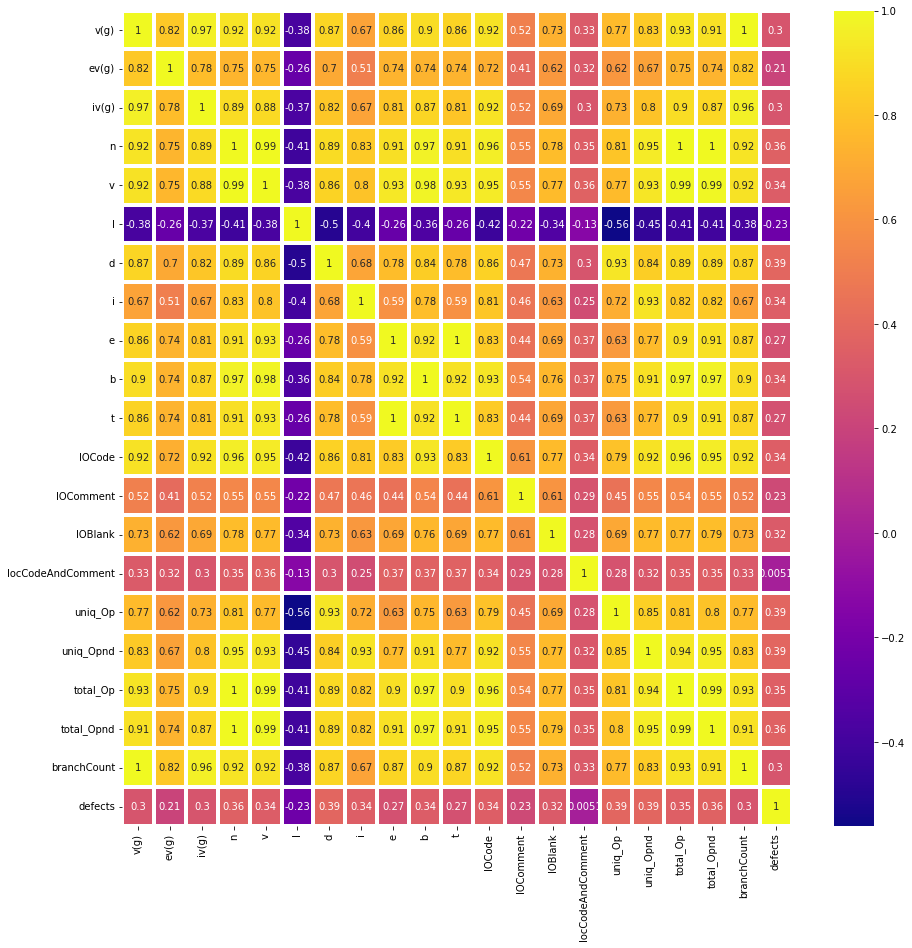

In [ ]:
plt.figure(figsize=(15,15))
corr = dataset.corr()
sns.heatmap(corr, annot = True, linewidths=3, cmap="plasma")

In [ ]:
corr_series = abs(corr.defects).sort_values(ascending = False)
top = pd.Series()
names = []
locations = []
for index, value in corr_series.items():
    if pd.api.types.is_float(value):
        if value > 0.085:
            names.append(value)
            locations.append(index)
      
names = names [1:]
locations = locations [1:]

values = pd.Series(names, index = locations)

top = top.append(values)
top

d              0.387493
uniq_Opnd      0.386714
uniq_Op        0.385566
total_Opnd     0.362549
n              0.355101
total_Op       0.348785
i              0.342854
lOCode         0.341529
v              0.339539
b              0.339028
lOBlank        0.323620
branchCount    0.297827
iv(g)          0.295694
v(g)           0.295570
t              0.270071
e              0.270070
l              0.232877
lOComment      0.232866
ev(g)          0.205159
dtype: float64

### Finding Absolute Value of Correlation of features with each other

In [ ]:
i_visited  = []
to_be_removed = []
all_indexes = []
for index, value in top.items():
    for index1, value in top.items():
        if(index not in all_indexes):
            all_indexes.append(index)
        if(abs(dataset[index].corr(dataset[index1]))) > 0.5 and index != index1:
            if(index not in i_visited and index1 not in i_visited):
                i_visited.append(index)
                i_visited.append(index1)
                to_be_removed.append(index1)
                print(f"The Absolute Value of Correlation For {index} and {index1} is: {dataset[index].corr(dataset[index1])}")

The Absolute Value of Correlation For d and uniq_Opnd is: 0.8440607118746573
The Absolute Value of Correlation For uniq_Op and total_Opnd is: 0.8034415289520408
The Absolute Value of Correlation For n and total_Op is: 0.998146239350489
The Absolute Value of Correlation For i and lOCode is: 0.8142573093170996
The Absolute Value of Correlation For v and b is: 0.9789578561559842
The Absolute Value of Correlation For lOBlank and branchCount is: 0.7296414229733458
The Absolute Value of Correlation For iv(g) and v(g) is: 0.9656894444920708
The Absolute Value of Correlation For t and e is: 0.9999999993905185


In [ ]:
all_indexes, to_be_removed #features to be removed

(['d',
  'uniq_Opnd',
  'uniq_Op',
  'total_Opnd',
  'n',
  'total_Op',
  'i',
  'lOCode',
  'v',
  'b',
  'lOBlank',
  'branchCount',
  'iv(g)',
  'v(g)',
  't',
  'e',
  'l',
  'lOComment',
  'ev(g)'],
 ['uniq_Opnd',
  'total_Opnd',
  'total_Op',
  'lOCode',
  'b',
  'branchCount',
  'v(g)',
  'e'])

In [ ]:
dataset=dataset.drop(to_be_removed,axis=1)

### New dataset with features selection

In [ ]:
dataset.head()

,ev(g),iv(g),n,v,l,d,i,t,lOComment,lOBlank,locCodeAndComment,uniq_Op,defects
0,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,2,2,2,1.2,False
1,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1,1,1,1.0,True
2,1.0,11.0,171.0,927.89,0.04,23.04,40.27,1187.70,10,6,0,18.0,True
3,6.0,8.0,141.0,769.78,0.07,14.86,51.81,635.37,2,5,0,16.0,True
4,1.0,3.0,58.0,254.75,0.11,9.35,27.25,132.33,0,2,0,11.0,True


## Spliting the dataset and getting new X and y after feature selection and Hyperparamter tuning

In [ ]:
X_fsh = dataset.drop("defects", axis=1)
y_fsh = dataset.defects

X_train_fsh, X_test_fsh, y_train_fsh, y_test_fsh = train_test_split(X_fsh, y_fsh, test_size = 0.2, stratify=y_fsh)

## Feature Scaling the updated dataset with X_fsh, y_fsh

In [ ]:
numerical_features = X_fsh.columns
scaler = StandardScaler()

transformer = ColumnTransformer([("scaler", scaler, numerical_features)], remainder = "passthrough")
transformed_X_train_fsh = transformer.fit_transform(X_train_fsh)
transformed_X_test_fsh = transformer.transform(X_test_fsh)
X_train_fsh = transformed_X_train_fsh
X_test_fsh = transformed_X_test_fsh

##Hyperparameter Tuning 

### Making dictionary of algorithms and parameters we want to tune in hyperparameter tuning

In [ ]:
model_params = {
    
    'Decision_tree': {
        'model': DecisionTreeClassifier(ccp_alpha=0.3,min_samples_split = 2, min_samples_leaf=10),
        'params': {
            'criterion': ['gini','entropy'],
            'max_depth' : [1,2,3,5,9,7], 
            #'min_samples_leaf' : [i for i in range(1, 16)],
            #'ccp_alpha' : [0.1, 0.2, 0.3, 0.4, 0.5],
        }
    },

    'Random_forest': {
        'model': RandomForestClassifier(min_samples_split = 2, min_samples_leaf=10),
        'params' : {
            'criterion': ['gini','entropy'],
            'n_estimators': [100, 300, 500, 700, 1000],
            'max_depth' : [10, 20, 30, 40, 50],
            #'min_samples_split' : [2, 5, 10, 15, 100],
            #'max_features': [i for i in range(5, 52, 5)]
        }
    },

    'LR' : {
        'model': LogisticRegression(),
        'params': {
            'penalty' : ['l1', 'l2', 'elasticnet','None'],
            'C': [0.5, 0.25, 0.75, 1, 1.25, 1.75],
            'max_iter' : [100, 200, 300]
        }
    }, 

    'SVM': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [0.25, 0.5, 0.75, 1, 1.25, 1.75],
            #'gamma': ['scale', 'auto']
        }  
    },

    'KNN' : {
        'model': KNeighborsClassifier(metric='minkowski', p = 2),
        'params': {
            'n_neighbors': [5, 10, 15, 20, 25, 30],
            'weights':['uniform','distance'],
            #'metric':['minkowski', 'euclidean', 'manhattan']
        }
    }, 

    'Navie Bayes' : {
        'model':  GaussianNB(),
        'params': {
            'var_smoothing' : [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e10, 1e9, 1e8, 1e7, 1e6, 1e5, 1e4, 1e3, 1e2, 1e1]
        }
    }

}

### Applying Grid Search to find the best model and the best parameters

In [ ]:
from sklearn.model_selection import GridSearchCV

def grid_search(dataset) :
    scores = []

    for model_name, mp in model_params.items():
        gd =  GridSearchCV(mp['model'], mp['params'], cv=2, return_train_score=False, verbose=1, n_jobs=-1)
        gd.fit(X, y)
        scores.append({
            'model': model_name,
            'best_score': gd.best_score_,
            'best_params': gd.best_params_
        })
        
    df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
    df
    return(df)

In [ ]:
#getting the best score and best parameters 
df = grid_search(dataset)
print(df)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
Fitting 2 folds for each of 50 candidates, totalling 100 fits
Fitting 2 folds for each of 72 candidates, totalling 144 fits
Fitting 2 folds for each of 6 candidates, totalling 12 fits
Fitting 2 folds for each of 12 candidates, totalling 24 fits
Fitting 2 folds for each of 21 candidates, totalling 42 fits
           model  best_score  \
0  Decision_tree    0.845424   
1  Random_forest    0.849694   
2             LR    0.853013   
3            SVM    0.845424   
4            KNN    0.848271   
5    Navie Bayes    0.854438   

                                         best_params  
0              {'criterion': 'gini', 'max_depth': 1}  
1  {'criterion': 'entropy', 'max_depth': 50, 'n_e...  
2      {'C': 1.25, 'max_iter': 200, 'penalty': 'l2'}  
3                                        {'C': 0.25}  
4          {'n_neighbors': 30, 'weights': 'uniform'}  
5                           {'var_smoothing': 0.001}  


###Defining the models with best parameters

In [ ]:
model1 = DecisionTreeClassifier(criterion=df.iloc[0]['best_params']['criterion'], max_depth=df.iloc[0]['best_params']['max_depth'], ccp_alpha=0.3, min_samples_leaf=10, min_samples_split=2)
model2 = RandomForestClassifier(criterion=df.iloc[1]['best_params']['criterion'], n_estimators=df.iloc[1]['best_params']['n_estimators'], max_depth=df.iloc[1]['best_params']['max_depth'], min_samples_split=2, min_samples_leaf=10) #max_features=df.iloc[1]['best_params']['max_features']) 
model3 = LogisticRegression(penalty=df.iloc[2]['best_params']['penalty'], C=df.iloc[2]['best_params']['C'], max_iter=df.iloc[2]['best_params']['max_iter'])
model4 = SVC(C=df.iloc[3]['best_params']['C'], gamma='auto') 
model5 = KNeighborsClassifier(n_neighbors=df.iloc[4]['best_params']['n_neighbors'], weights=df.iloc[4]['best_params']['weights'],  metric='minkowski', p = 2)
model6 = GaussianNB(var_smoothing=df.iloc[5]['best_params']['var_smoothing'])
#model7 = MLPClassifier(hidden_layer_sizes=df.iloc[6]['best_params']['hidden_layer_sizes'], max_iter=df.iloc[6]['best_params']['max_iter'], activation=df.iloc[6]['best_params']['activation'], learning_rate='constant', solver='adam', alpha=df.iloc[6]['best_params']['alpha'])

### Training the models using 10-fold cross validation and getting Accuracy

In [ ]:
#models defined above and getting accuracy by calling the funcation model_train
Dscore_fsh, Rscore_fsh, Lscore_fsh, Sscore_fsh, Kscore_fsh, Nscore_fsh = model_train(X_fsh, y_fsh, X_train_fsh, X_test_fsh, y_train_fsh, y_test_fsh)



--------------------------------------------- For Decision Tree Classifier ---------------------------------------------

Accuracy by cross_val_score fuction :  89.54254118709095
F1 score :  0.0

Confusion Matrix :-
 [[357   0]
 [ 65   0]]

Classification Report : 
               precision    recall  f1-score   support

       False       0.85      1.00      0.92       357
        True       0.00      0.00      0.00        65

    accuracy                           0.85       422
   macro avg       0.42      0.50      0.46       422
weighted avg       0.72      0.85      0.78       422


---------------------------------------------- For Random Forest Classifier ----------------------------------------------
Accuracy by cross_val_score fuction :  90.54412096592192
F1 score :  0.2727272727272727

Confusion Matrix :-
 [[346  11]
 [ 53  12]]

Classification Report : 
               precision    recall  f1-score   support

       False       0.87      0.97      0.92       357
        Tru

## Table showing the accuracies of the six algorithms before and after hyperparameter tunning and feature selection

In [50]:
Acc = [Dscore, Rscore, Lscore, Sscore, Kscore, Nscore]
Acc_fsh = [Dscore_fsh, Rscore_fsh, Lscore_fsh, Sscore_fsh, Kscore_fsh, Nscore_fsh]

table_final = np.column_stack((Acc, Acc_fsh))
table_frame = pd.DataFrame(table_final, columns = ['Accuracy_befr_HPT', 'Accuracy_wth_HPT_FS'], 
                                 index = ['Decision_Tree', 'Random_Forest', 'Logistic_Regression', 'SVM', 'KNN', 'Naive_Bayes'])
table_frame

,Accuracy_befr_HPT,Accuracy_wth_HPT_FS
Decision_Tree,78.286617,89.542541
Random_Forest,82.696005,90.544121
Logistic_Regression,84.165425,90.971564
SVM,80.514331,88.542541
KNN,82.932747,88.543444
Naive_Bayes,82.175807,89.593320


## Feature Ranking 

In [51]:
import sys
from collections import Counter
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_extraction.text import CountVectorizer

#Feature Ranking
res =  mutual_info_classif(X, y)
res = [0.21819637, 0.26307731,0.02089729,0.10408425,0.11165286,0.00157417
, 0.18526162, 0.20435355, 0.22257146, 0.21166985, 0.16536938, 0.22514492,
 0.18096379, 0.17603666, 0.02876315, 0.14915057, 0.10985039, 0.03965201,
 0.07511509, 0.0803626,  0.06559521, 0.0218448,  0.15778717,
 0.13496679, 0.01078187, 0.04066395]
features_name = ["v(g)", "ev(g)", "iv(g)", "n", "v", "l",	"d", "i", "e", "b", "t", "lOCode", "lOComment", "lOBlank", "locCodeAndComment", "uniq_Op",	"uniq_Opnd",	"total_Op",	"total_Opnd", "branchCount"]
features = []
for ind, i in enumerate(features_name):
    features.append([i, res[ind]])

features = sorted(features, key= lambda x:x[1], reverse= True)
for i in features:
    print(i[0],"\t",i[1])

ev(g) 	 0.26307731
lOCode 	 0.22514492
e 	 0.22257146
v(g) 	 0.21819637
b 	 0.21166985
i 	 0.20435355
d 	 0.18526162
lOComment 	 0.18096379
lOBlank 	 0.17603666
t 	 0.16536938
uniq_Op 	 0.14915057
v 	 0.11165286
uniq_Opnd 	 0.10985039
n 	 0.10408425
branchCount 	 0.0803626
total_Opnd 	 0.07511509
total_Op 	 0.03965201
locCodeAndComment 	 0.02876315
iv(g) 	 0.02089729
l 	 0.00157417
